<a href="https://colab.research.google.com/github/geocarvalho/python-ds/blob/master/applied-data-science-with-python/applied_ml_in_python/week1_applied_ml_in_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Applied ML in Python

## Week 1

### Key concepts in ML
#### A basic ML workflow

> Representation > Evaluation > Optimization

* **Representation**, choose:
 * A feature representation;
 * Type of classifier to use;
 * Example: Image pixels, with k-nearest neighbor classifier.

* **Evaluation**, choose:
 * What criterion distinguishes good vs. bad classifiers?
 * Example: % correct predictions on test set.


* **Optimization**, choose:
 * How to search for the settings/parameters that give the best classifier for this evaluation criterion;
 * Example: try a range of values for *k* parameter in k-nearest neighbor classifier.

#### Feature representations

* Email = a list of words with their frequency counts;
* Picture = a matrix of color values (pixels);
* Sea creatures = a set of attribute values.

#### Cicle

1. Initial guess about the feature representation and the apropriated classifier;
2. Learning model;
3. Evaluate results;
4. Correct parameters or select another algorithm;

### Python tools for ML

* Scikit-learn, SciPy, NumPy, Pandas and Matplotlib;

## Applied Machine Learning, Module 1:  A simple classification task

### Import required modules and load data file

In [12]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

uri = "https://raw.githubusercontent.com/susanli2016/Machine-Learning-with-Python/master/fruit_data_with_colors.txt"
fruits = pd.read_table(uri)
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [13]:
# create a mapping from fruit label value to fruit name to make results easier to interpret
lookup_fruit_name = dict(zip(fruits.fruit_label.unique(), fruits.fruit_name.unique()))   
lookup_fruit_name

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

* The file contains the mass, height, and width of a selection of oranges, lemons and apples. The heights were measured along the core of the fruit. The widths were the widest width perpendicular to the height.

### Examining the data

In [14]:
# plotting a scatter matrix
from matplotlib import cm

X = fruits[['height', 'width', 'mass', 'color_score']]
y = fruits['fruit_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

cmap = cm.get_cmap('gnuplot')
scatter = pd.plotting.scatter_matrix(X_train, c= y_train, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap=cmap)

<IPython.core.display.Javascript object>

In [15]:
# plotting a 3D scatter plot
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X_train['width'], X_train['height'], X_train['color_score'], c = y_train, marker = 'o', s=100)
ax.set_xlabel('width')
ax.set_ylabel('height')
ax.set_zlabel('color_score')
plt.show()

<IPython.core.display.Javascript object>

### Create train-test split

In [16]:
# For this example, we use the mass, width, and height features of each fruit instance
X = fruits[['mass', 'width', 'height']]
y = fruits['fruit_label']

# default is 75% / 25% train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(44, 3) (15, 3) (44,) (15,)


### The k-Nearest Neighbor (k-NN) classifier algorithm

* Given a training set X_train with labels y_train, and given a new instance x_test to be classified:
 1. Find the most similar instances (let's call them X_NN) to x_test that are in X_train;
 2. Get the labels y_NN for the instances in X_NN;
 3. Predict the label for x_test by combining the labels y_NN
 > e.g.: simple majority vote (take the class that's most predominant in the labels of the neighbor examples).

* Decision boundary: query points that are on one side of the line get mapped to one class and points that are on the other side of the line get mapped to a different class;

> Based on Euclidean distance.

* A k-NN algorithm needs four things specified:
 1. A distance metric, typically Euclidean distance (Minkowski with p=2);
 2. How many 'nearest' neighbors to look at? k=5 for example;
 3. Optional weighting function on the neighbor points, ignored in the example;
 4. Method for aggregating the class of neighbor points. Simple majority vote for example.

### Create classifier object

* Train the classifier (fit the estimator) using the training data;
* Estimate the accuracy of the classifier on future data, using the test data.

In [17]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.5333333333333333

### Use the trained k-NN classifier model to classify new, previously unseen objects

In [18]:
# first example: a small fruit with mass 20g, width 4.3 cm, height 5.5 cm
fruit_prediction = knn.predict([[20, 4.3, 5.5]])
lookup_fruit_name[fruit_prediction[0]]

'mandarin'

In [19]:
# second example: a larger, elongated fruit with mass 100g, width 6.3 cm, height 8.5 cm
fruit_prediction = knn.predict([[100, 6.3, 8.5]])
lookup_fruit_name[fruit_prediction[0]]

'lemon'

### Plot the decision boundaries of the k-NN classifier

In [0]:
# from adspy_shared_utilities import plot_fruit_knn

# plot_fruit_knn(X_train, y_train, 5, 'uniform')   # we choose 5 nearest neighbors

### How sensitive is k-NN classification accuracy to the choice of the 'k' parameter?


In [21]:
k_range = range(1,20)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20]);

<IPython.core.display.Javascript object>

* We can see that when K has a small value like 1, the classifier is good at learning the classes for individual points in the training set. But with a decision boundary that's fragmented with considerable variation, This is because when K=1, the prediction is sensitive to noise, outliers, mislabeled data, and other sources of variation in individual data points;

* For larger values of K, the areas assigned to different classes are smoother and not as fragmented and more robust to noise in the individual points. But possibly with more mistakes in individual points;

* This is an example of what's known as the **bias/variance tradeoff**;

* In general with k-NN using a larger **k** suppresses the effects of noisy individual labels, but results in classification boundaries that are less detailed.

### How sensitive is k-NN classification accuracy to the train/test split proportion?

In [22]:
t = [0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2]

knn = KNeighborsClassifier(n_neighbors = 5)

plt.figure()

for s in t:

    scores = []
    for i in range(1,1000):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1-s)
        knn.fit(X_train, y_train)
        scores.append(knn.score(X_test, y_test))
    plt.plot(s, np.mean(scores), 'bo')

plt.xlabel('Training set proportion (%)')
plt.ylabel('accuracy');

<IPython.core.display.Javascript object>

* A low value of **k** (close to 1) is more likely to overfit the training data and lead to worse accuracy on the test data, compared to higher values of **k**;

* Setting "k" to the number of points in the training set will result in a classifier that **always** predicts the majority class;

* The k-NN classification algorithm has to memorize all of the training examples to make a prediction. It means that it not scale for large datasets.

This Nov. 2016 article by Zachary C. Lipton from the blog Approximately Correct discusses why and how automated processes for decision-making, particularly applications of machine learning, can exhibit bias in subtle and not-so-subtle ways. It's self-contained and includes a mini-review of machine learning concepts that reinforces what's covered in Module 1. This reading is optional for completion of the course.

http://approximatelycorrect.com/2016/11/07/the-foundations-of-algorithmic-bias/

If you're interested in the more general topic of ethics in data science, we recommend this online course in Data Science Ethics by Prof. H.V. Jagadish of the University of Michigan.

https://www.edx.org/course/data-science-ethics-michiganx-ds101x-1

## Assignment 1 - Introduction to Machine Learning

In [23]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

print(cancer.DESCR) # Print the data set description

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [24]:
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

### Question 0 (Example)

How many features does the breast cancer dataset have?

*This function should return an integer.*

In [25]:
# You should write your whole answer within the function provided. The autograder will call
# this function and compare the return value against the correct solution value
def answer_zero():
    # This function returns the number of features of the breast cancer dataset, which is an integer. 
    # The assignment question description will tell you the general format the autograder is expecting
    return len(cancer['feature_names'])

# You can examine what your function returns by calling it in the cell. If you have questions
# about the assignment formats, check out the discussion forums for any FAQs
answer_zero() 

30

### Question 1

Scikit-learn works with lists, numpy arrays, scipy-sparse matrices, and pandas DataFrames, so converting the dataset to a DataFrame is not necessary for training this model. Using a DataFrame does however help make many things easier such as munging data, so let's practice creating a classifier with a pandas DataFrame.

In [26]:
def answer_one():
    data = np.c_[cancer.data, cancer.target]
    columns = np.append(cancer.feature_names, ["target"])
    return pd.DataFrame(data, columns=columns)

output = answer_one()
print(output.head())
assert output.shape == (len(cancer.target), 31)

   mean radius  mean texture  ...  worst fractal dimension  target
0        17.99         10.38  ...                  0.11890     0.0
1        20.57         17.77  ...                  0.08902     0.0
2        19.69         21.25  ...                  0.08758     0.0
3        11.42         20.38  ...                  0.17300     0.0
4        20.29         14.34  ...                  0.07678     0.0

[5 rows x 31 columns]


### Question 2
What is the class distribution? (i.e. how many instances of malignant and how many benign?)

In [27]:
def answer_two():
    cancerdf = answer_one()
    counts = cancerdf.target.value_counts(ascending=True)
    counts.index = ["malignant", "benign"]
    
    return counts


output = answer_two()
print(output)
assert output.malignant == 212
assert output.benign == 357

malignant    212
benign       357
Name: target, dtype: int64


### Question 3
Split the DataFrame into X (the data) and y (the labels).

In [28]:
def answer_three():
    cancerdf = answer_one()
    
    X = cancerdf[cancerdf.columns[:-1]]
    y = cancerdf.target
    
    return X, y

X, y = answer_three()
print(X.shape, y.shape)
assert X.shape == (569, 30)
assert y.shape == (569,)

(569, 30) (569,)


### Question 4
Using train_test_split(), split X and y into training and test sets (X_train, X_test, y_train, and y_test).

In [29]:
from sklearn.model_selection import train_test_split

def answer_four():
    X, y = answer_three()
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=426, test_size=143, random_state=0)
    
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = answer_four()
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)
assert X_train.shape == (426, 30)
assert X_test.shape == (143, 30)
assert y_train.shape == (426,)
assert y_test.shape == (143,)

(426, 30) (143, 30)
(426,) (143,)


### Question 5
Using KNeighborsClassifier, fit a k-nearest neighbors (knn) classifier with X_train, y_train and using one nearest neighbor (n_neighbors = 1).

In [0]:
from sklearn.neighbors import KNeighborsClassifier

def answer_five():
    X_train, X_test, y_train, y_test = answer_four()
    
    model = KNeighborsClassifier(n_neighbors=1)
    model.fit(X_train, y_train)
    
    return model

knn = answer_five()
assert type(knn) == KNeighborsClassifier
assert knn.n_neighbors == 1

### Question 6
Using your knn classifier, predict the class label using the mean value for each feature.

You can use `cancerdf.mean()[:-1].values.reshape(1, -1)` which gets the mean value for each feature, ignores the target column, and reshapes the data from 1 dimension to 2 (necessary for the predict method of KNeighborsClassifier).

In [31]:
def answer_six():
    cancerdf = answer_one()
    means = cancerdf.mean()[:-1].values.reshape(1, -1)
    print(means)
    model = answer_five()
    
    return model.predict(means)

answer_six()

[[1.41272917e+01 1.92896485e+01 9.19690334e+01 6.54889104e+02
  9.63602812e-02 1.04340984e-01 8.87993158e-02 4.89191459e-02
  1.81161863e-01 6.27976098e-02 4.05172056e-01 1.21685343e+00
  2.86605923e+00 4.03370791e+01 7.04097891e-03 2.54781388e-02
  3.18937163e-02 1.17961371e-02 2.05422988e-02 3.79490387e-03
  1.62691898e+01 2.56772232e+01 1.07261213e+02 8.80583128e+02
  1.32368594e-01 2.54265044e-01 2.72188483e-01 1.14606223e-01
  2.90075571e-01 8.39458172e-02]]


array([1.])

### Question 7
Using your knn classifier, predict the class labels for the test set X_test.

In [0]:
def answer_seven():
    X_train, X_test, y_train, y_test = answer_four()
    knn = answer_five()
    
    return knn.predict(X_test)

predictions = answer_seven()
print("no cancer: {}".format(len(predictions[predictions==0])))
print("cancer: {}".format(len(predictions[predictions==1])))
assert predictions.shape == (143,)
assert set(predictions) == {0.0, 1.0}


### Question 8
Find the score (mean accuracy) of your knn classifier using X_test and y_test.

In [32]:
def answer_eight():
    X_train, X_test, y_train, y_test = answer_four()
    knn = answer_five()
    
    return knn.score(X_test, y_test)

answer_eight()

0.916083916083916

### Optional plot
Try using the plotting function below to visualize the differet predicition scores between training and test sets, as well as malignant and benign cells.

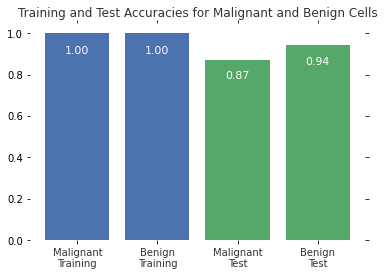

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline

def accuracy_plot():
    X_train, X_test, y_train, y_test = answer_four()

    # Find the training and testing accuracies by target value (i.e. malignant, benign)
    mal_train_X = X_train[y_train==0]
    mal_train_y = y_train[y_train==0]
    ben_train_X = X_train[y_train==1]
    ben_train_y = y_train[y_train==1]

    mal_test_X = X_test[y_test==0]
    mal_test_y = y_test[y_test==0]
    ben_test_X = X_test[y_test==1]
    ben_test_y = y_test[y_test==1]

    knn = answer_five()

    scores = [knn.score(mal_train_X, mal_train_y), knn.score(ben_train_X, ben_train_y), 
              knn.score(mal_test_X, mal_test_y), knn.score(ben_test_X, ben_test_y)]


    plt.figure()

    # Plot the scores as a bar chart
    bars = plt.bar(np.arange(4), scores, color=['#4c72b0','#4c72b0','#55a868','#55a868'])

    # directly label the score onto the bars
    for bar in bars:
        height = bar.get_height()
        plt.gca().text(bar.get_x() + bar.get_width()/2, height*.90, '{0:.{1}f}'.format(height, 2), 
                     ha='center', color='w', fontsize=11)

    # remove all the ticks (both axes), and tick labels on the Y axis
    plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')

    # remove the frame of the chart
    for spine in plt.gca().spines.values():
        spine.set_visible(False)

    plt.xticks([0,1,2,3], ['Malignant\nTraining', 'Benign\nTraining', 'Malignant\nTest', 'Benign\nTest'], alpha=0.8);
    plt.title('Training and Test Accuracies for Malignant and Benign Cells', alpha=0.8)
    plt.show()

accuracy_plot() 